In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import pickle
import networkx as nx
import math

In [4]:
df_plottinglist2018_EN = pd.read_csv('df_plottinglist2018_EN.csv')
df_plottinglist2019_EN = pd.read_csv('df_plottinglist2019_EN.csv')
df_plottinglist2020_EN = pd.read_csv('df_plottinglist2020_EN.csv')
df_plottinglist2018_WE = pd.read_csv('df_plottinglist2018_WE.csv')
df_plottinglist2019_WE = pd.read_csv('df_plottinglist2019_WE.csv')
df_plottinglist2020_WE = pd.read_csv('df_plottinglist2020_WE.csv')

In [5]:
df_plottinglist2018_EN.set_index('key',inplace=True)
df_plottinglist2019_EN.set_index('key',inplace=True)
df_plottinglist2020_EN.set_index('key',inplace=True)
df_plottinglist2018_WE.set_index('key',inplace=True)
df_plottinglist2019_WE.set_index('key',inplace=True)
df_plottinglist2020_WE.set_index('key',inplace=True)

In [6]:
m_EN_2018 , b_EN_2018 = np.polyfit(df_plottinglist2018_EN[df_plottinglist2018_EN.nodes<0.25].nodes.values, df_plottinglist2018_EN[df_plottinglist2018_EN.nodes<0.25].edges.values, 1)
m_EN_2019 , b_EN_2019 = np.polyfit(df_plottinglist2019_EN[df_plottinglist2019_EN.nodes<0.4].nodes.values, df_plottinglist2019_EN[df_plottinglist2019_EN.nodes<0.4].edges.values, 1)
m_EN_2020 , b_EN_2020 = np.polyfit(df_plottinglist2020_EN[df_plottinglist2020_EN.nodes<0.4].nodes.values, df_plottinglist2020_EN[df_plottinglist2020_EN.nodes<0.4].edges.values, 1)
m_WE_2018 , b_WE_2018 = np.polyfit(df_plottinglist2018_WE[df_plottinglist2018_WE.edges<-6].edges.values, df_plottinglist2018_WE[df_plottinglist2018_WE.edges<-6].weights.values, 1)
m_WE_2019 , b_WE_2019 = np.polyfit(df_plottinglist2019_WE[df_plottinglist2019_WE.edges<-6].edges.values, df_plottinglist2019_WE[df_plottinglist2019_WE.edges<-6].weights.values, 1)
m_WE_2020 , b_WE_2020 = np.polyfit(df_plottinglist2020_WE[df_plottinglist2020_WE.edges<-4].edges.values, df_plottinglist2020_WE[df_plottinglist2020_WE.edges<-4].weights.values, 1)

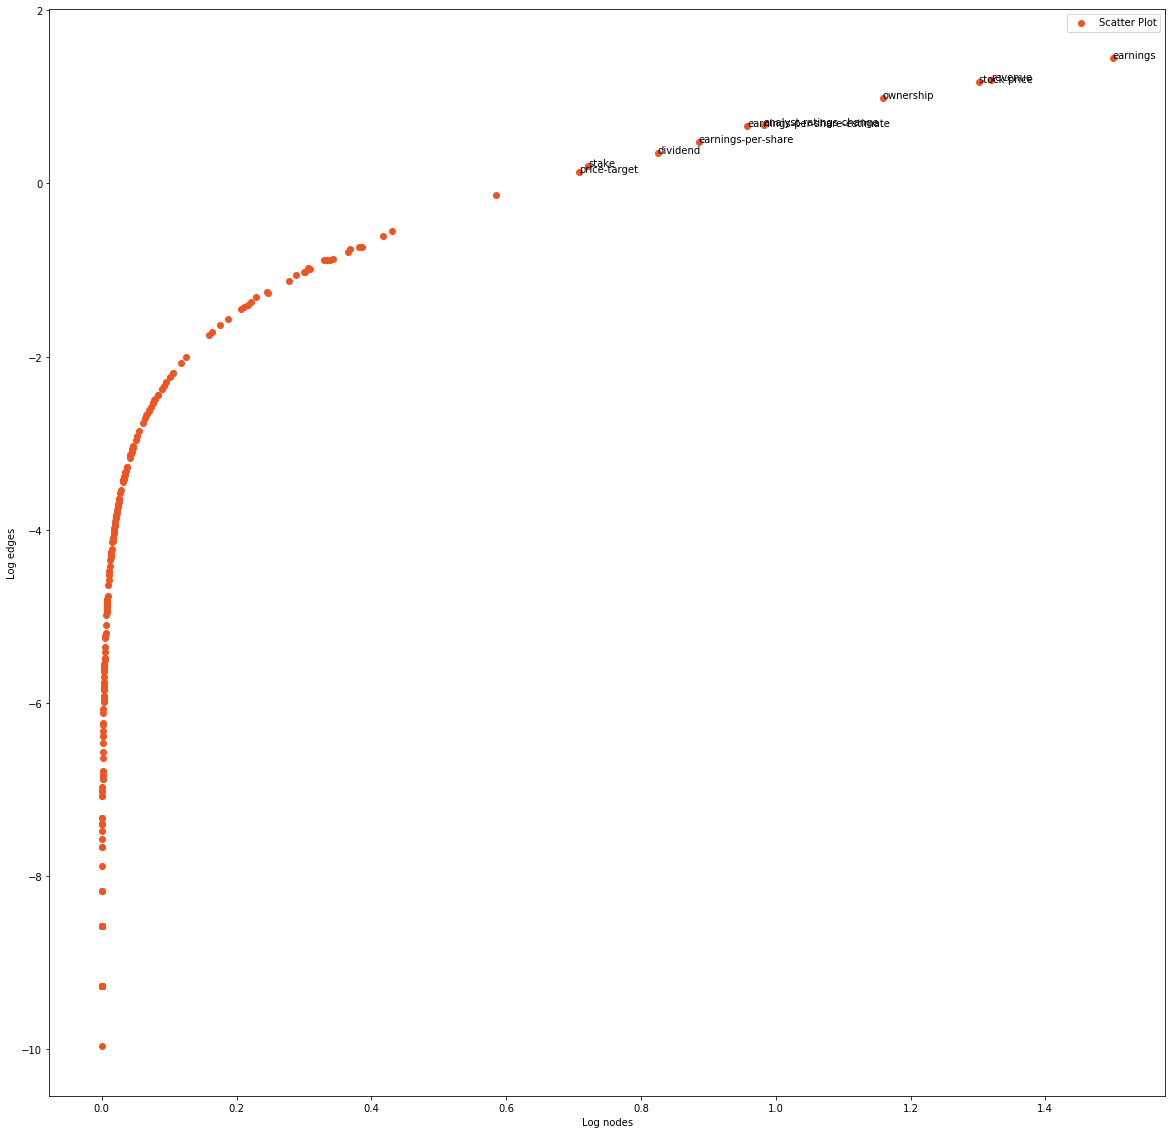

['revenue', 'price-target', 'earnings-per-share-estimate', 'ownership', 'earnings', 'stake', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']


In [24]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2020_EN.nodes.values)
min_x = np.min(df_plottinglist2020_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_EN_2020 + m_EN_2020 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
# plt.plot(x, y, color='b', label='Regression Line (slope m)')
# plt.plot(x, b_EN_2020 - 0.005 + 0.95 * m_EN_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_EN_2020 + 0.005 + 1.05 * m_EN_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2020_EN.nodes.values, df_plottinglist2020_EN.edges.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
        
df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
for key in df_plottinglist2020_EN.index:
    if df_plottinglist2020_EN.edges[key]>0:
        plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
        df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
    
plt.xlabel('Log nodes')
plt.ylabel('Log edges')
plt.legend()

plt.show()
print(df_plottinglist2020_EN_outlier_prediction_throughgraphs)

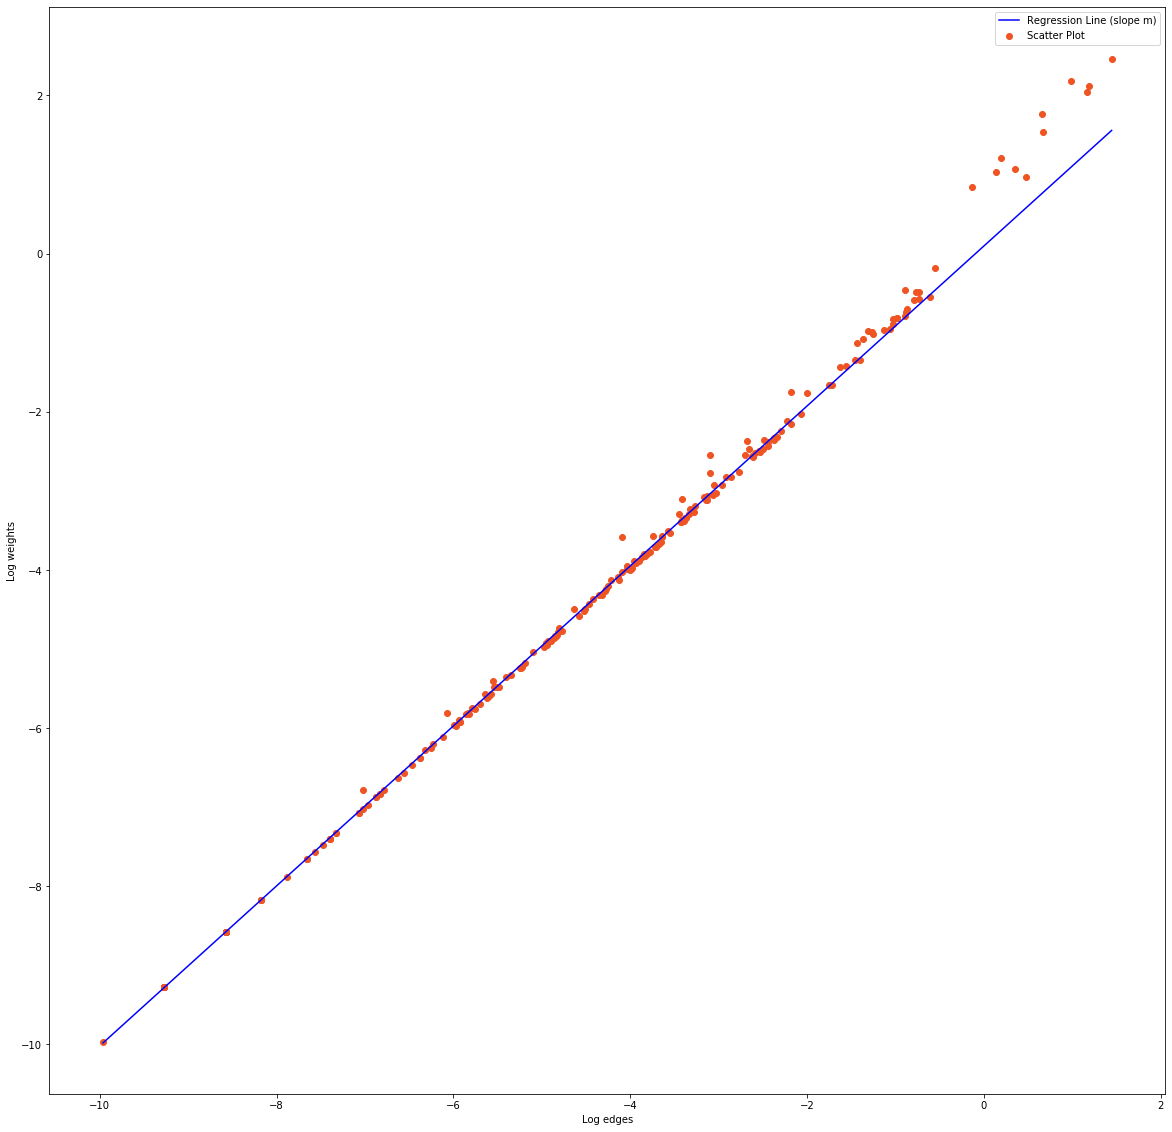

In [18]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2020_WE.edges.values)
min_x = np.min(df_plottinglist2020_WE.edges.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_WE_2020 + m_WE_2020 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
plt.plot(x, y, color='b', label='Regression Line (slope m)')
# plt.plot(x, b_WE_2020 - 0.005 + 0.95 * m_WE_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_WE_2020 + 0.005 + 1.05 * m_WE_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2020_WE.edges.values, df_plottinglist2020_WE.weights.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
    
plt.xlabel('Log edges')
plt.ylabel('Log weights')
plt.legend()

plt.show()

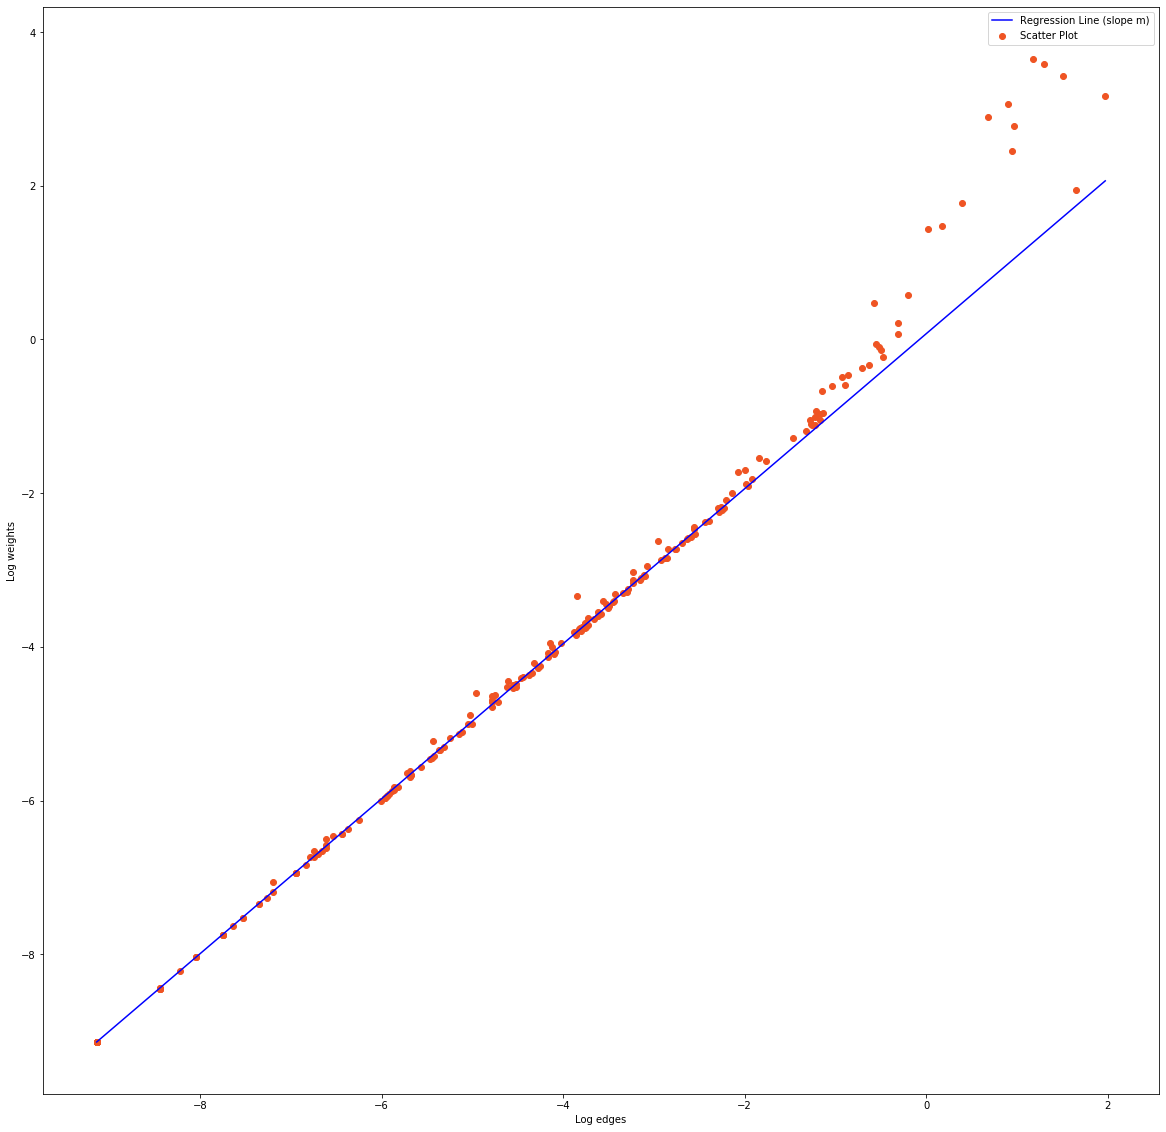

In [20]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2018_WE.edges.values)
min_x = np.min(df_plottinglist2018_WE.edges.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_WE_2018 + m_WE_2018 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
plt.plot(x, y, color='b', label='Regression Line (slope m)')
# plt.plot(x, b_WE_2020 - 0.005 + 0.95 * m_WE_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_WE_2020 + 0.005 + 1.05 * m_WE_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2018_WE.edges.values, df_plottinglist2018_WE.weights.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
    
plt.xlabel('Log edges')
plt.ylabel('Log weights')
plt.legend()

plt.show()

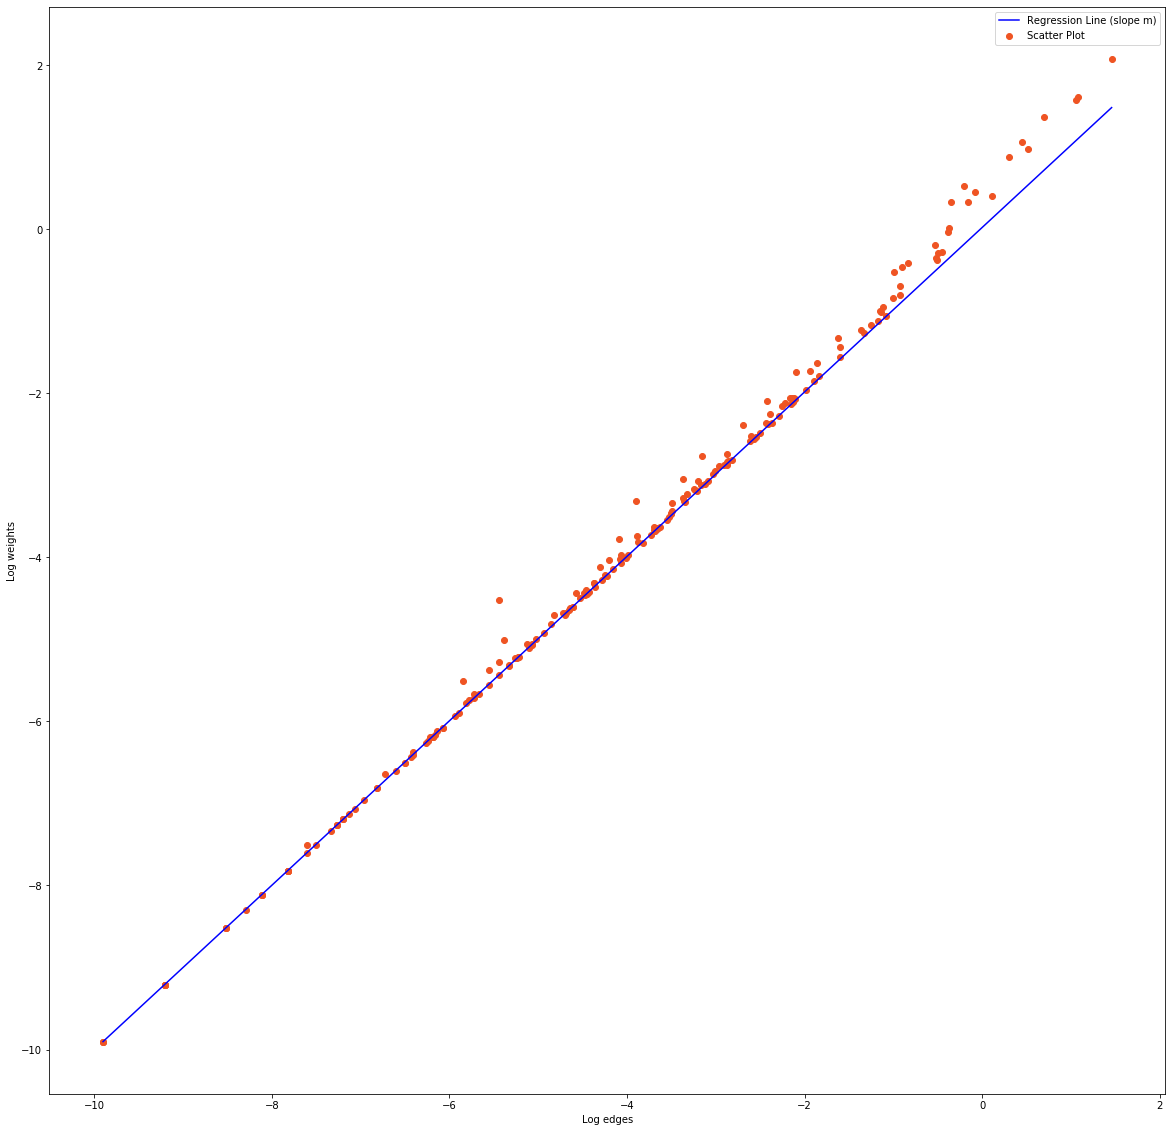

In [22]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2019_WE.edges.values)
min_x = np.min(df_plottinglist2019_WE.edges.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_WE_2019 + m_WE_2019 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
plt.plot(x, y, color='b', label='Regression Line (slope m)')
# plt.plot(x, b_WE_2020 - 0.005 + 0.95 * m_WE_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_WE_2020 + 0.005 + 1.05 * m_WE_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2019_WE.edges.values, df_plottinglist2019_WE.weights.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
    
plt.xlabel('Log edges')
plt.ylabel('Log weights')
plt.legend()

plt.show()

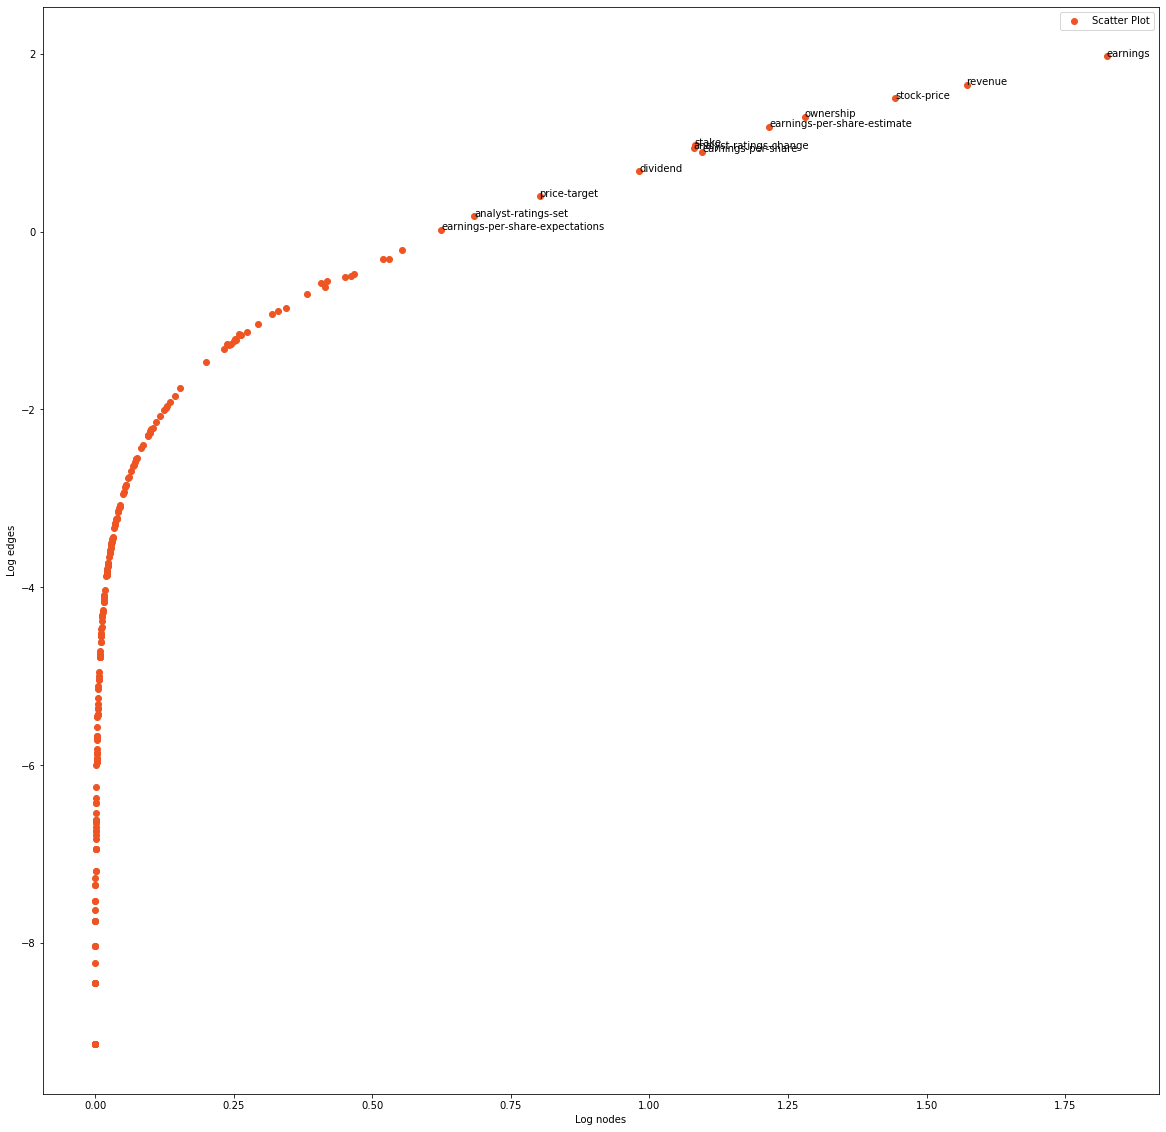

['earnings-per-share-expectations', 'analyst-ratings-set', 'revenue', 'price-target', 'earnings-per-share-estimate', 'ownership', 'earnings', 'stake', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']


In [26]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2018_EN.nodes.values)
min_x = np.min(df_plottinglist2018_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_EN_2018 + m_EN_2018 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
# plt.plot(x, y, color='b', label='Regression Line (slope m)')
# plt.plot(x, b_EN_2020 - 0.005 + 0.95 * m_EN_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_EN_2020 + 0.005 + 1.05 * m_EN_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2018_EN.nodes.values, df_plottinglist2018_EN.edges.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)
  
df_plottinglist2018_EN_outlier_prediction_throughgraphs = []
for key in df_plottinglist2018_EN.index:
    if df_plottinglist2018_EN.edges[key]>0:
        plt.annotate(key, (df_plottinglist2018_EN.nodes[key], df_plottinglist2018_EN.edges[key]))
        df_plottinglist2018_EN_outlier_prediction_throughgraphs.append(key)

plt.xlabel('Log nodes')
plt.ylabel('Log edges')
plt.legend()

plt.show()
print(df_plottinglist2018_EN_outlier_prediction_throughgraphs)

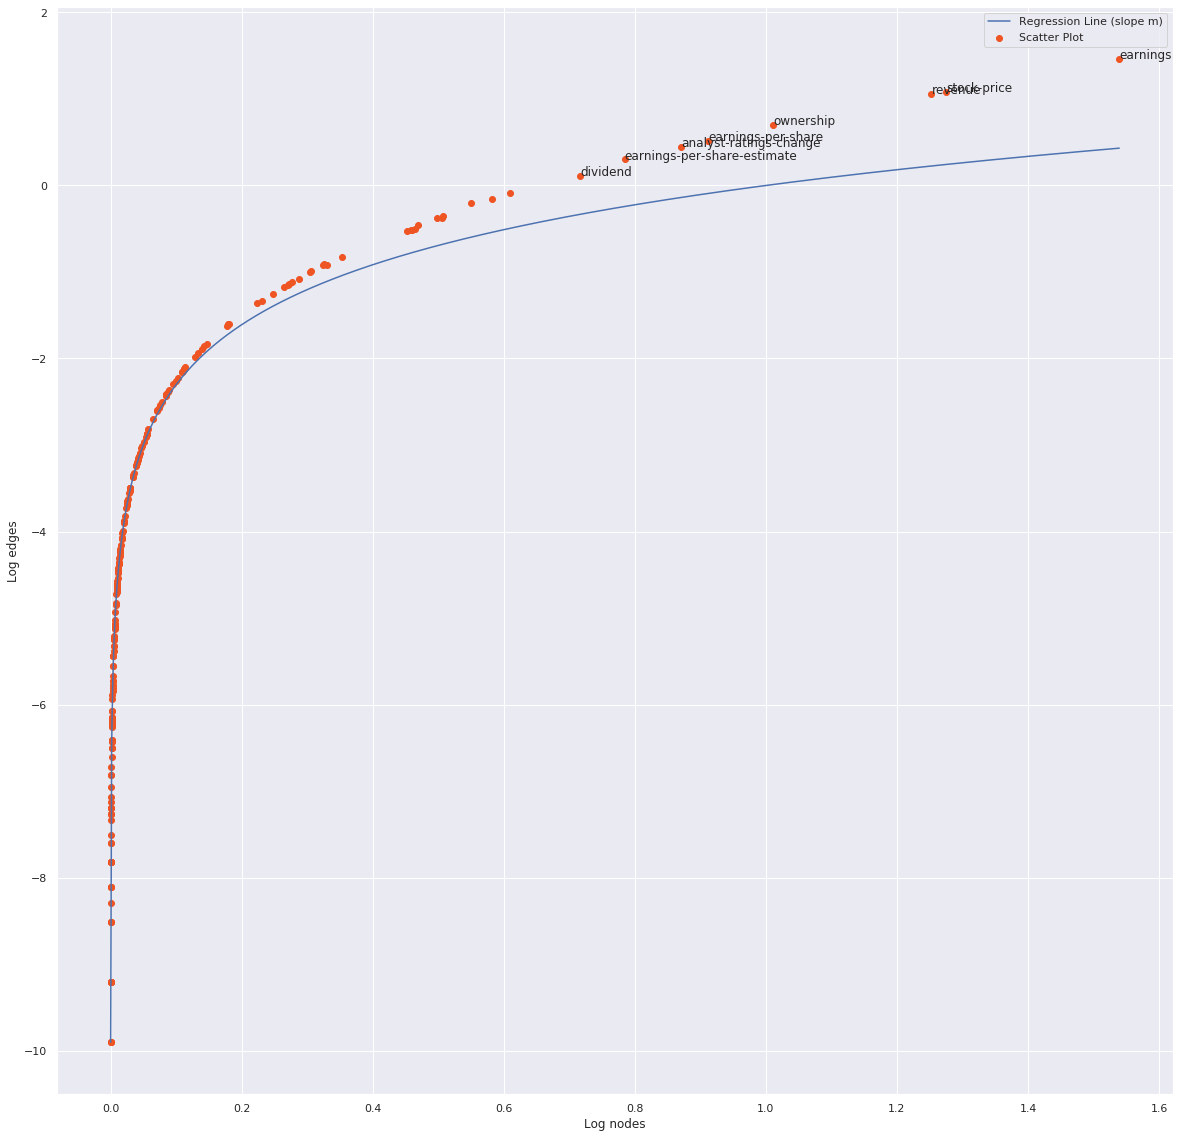

['revenue', 'earnings-per-share-estimate', 'ownership', 'earnings', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']


In [106]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2019_EN.nodes.values)
min_x = np.min(df_plottinglist2019_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b_EN_2019 + m_EN_2019 * x
 
# Ploting Line
plt.figure(figsize=(20,20))
plt.plot(x, np.log(x), color='b', label='Regression Line (slope m)')
# plt.plot(x, b_EN_2020 - 0.005 + 0.95 * m_EN_2020 * x, color='g', label='Slope=(0.95*m) line',linestyle='dashed')
# plt.plot(x, b_EN_2020 + 0.005 + 1.05 * m_EN_2020 * x, color='r', label='Slope=(1.05*m) line',linestyle='dashed')
# Ploting Scatter Points
plt.scatter(df_plottinglist2019_EN.nodes.values, df_plottinglist2019_EN.edges.values, c='#ef5423', label='Scatter Plot')

# df_plottinglist2020_EN_outlier_prediction_throughgraphs = []
# for key in df_plottinglist2020_EN.index:
#     if not ((df_plottinglist2020_EN.edges[key] > b_EN_2020 - 0.005 + 0.95 * m_EN_2020 *df_plottinglist2020_EN.nodes[key]) and (df_plottinglist2020_EN.edges[key] < b_EN_2020 + 0.005 + 1.05 * m_EN_2020 *df_plottinglist2020_EN.nodes[key])):
#         plt.annotate(key, (df_plottinglist2020_EN.nodes[key], df_plottinglist2020_EN.edges[key]))
#         df_plottinglist2020_EN_outlier_prediction_throughgraphs.append(key)

df_plottinglist2019_EN_outlier_prediction_throughgraphs = []
for key in df_plottinglist2019_EN.index:
    if df_plottinglist2019_EN.edges[key]>0:
        plt.annotate(key, (df_plottinglist2019_EN.nodes[key], df_plottinglist2019_EN.edges[key]))
        df_plottinglist2019_EN_outlier_prediction_throughgraphs.append(key)
    
plt.xlabel('Log nodes')
plt.ylabel('Log edges')
plt.legend()

plt.show()
print(df_plottinglist2019_EN_outlier_prediction_throughgraphs)

In [29]:
print(df_plottinglist2018_EN_outlier_prediction_throughgraphs)
print(df_plottinglist2019_EN_outlier_prediction_throughgraphs)
print(df_plottinglist2020_EN_outlier_prediction_throughgraphs)

['earnings-per-share-expectations', 'analyst-ratings-set', 'revenue', 'price-target', 'earnings-per-share-estimate', 'ownership', 'earnings', 'stake', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']
['revenue', 'earnings-per-share-estimate', 'ownership', 'earnings', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']
['revenue', 'price-target', 'earnings-per-share-estimate', 'ownership', 'earnings', 'stake', 'analyst-ratings-change', 'dividend', 'stock-price', 'earnings-per-share']


In [30]:
set(df_plottinglist2020_EN_outlier_prediction_throughgraphs) - set(df_plottinglist2019_EN_outlier_prediction_throughgraphs) - set(df_plottinglist2018_EN_outlier_prediction_throughgraphs)

set()

In [7]:
file2018 = open('Ei2018.pickle', 'rb')
Ei2018 = pickle.load(file2018)
file2018.close()
file2019 = open('Ei2019.pickle', 'rb')
Ei2019 = pickle.load(file2019)
file2019.close()
file2020 = open('Ei2020.pickle', 'rb')
Ei2020 = pickle.load(file2020)
file2020.close()
file2018 = open('Ni2018.pickle', 'rb')
Ni2018 = pickle.load(file2018)
file2018.close()
file2019 = open('Ni2019.pickle', 'rb')
Ni2019 = pickle.load(file2019)
file2019.close()
file2020 = open('Ni2020.pickle', 'rb')
Ni2020 = pickle.load(file2020)
file2020.close()
file2018 = open('Wi2018.pickle', 'rb')
Wi2018 = pickle.load(file2018)
file2018.close()
file2019 = open('Wi2019.pickle', 'rb')
Wi2019 = pickle.load(file2019)
file2019.close()
file2020 = open('Wi2020.pickle', 'rb')
Wi2020 = pickle.load(file2020)
file2020.close()

In [8]:
outliercheck2018_EN = {}
for key in Ei2018:
    outliercheck2018_EN[key] = abs(max([math.log(Ei2018[key]),m_EN_2018*(math.log(Ni2018[key]))+b_EN_2018])/min([math.log(Ei2018[key]),m_EN_2018*(math.log(Ni2018[key]))+b_EN_2018])) * math.log(abs((math.log(Ei2018[key])-m_EN_2018*(math.log(Ni2018[key]))+b_EN_2018)/math.log(Ei2018[key]))+1)

outliercheck2019_EN = {}
for key in Ei2019:
    outliercheck2019_EN[key] = abs(max([math.log(Ei2019[key]),m_EN_2019*(math.log(Ni2019[key]))+b_EN_2019])/min([math.log(Ei2019[key]),m_EN_2019*(math.log(Ni2019[key]))+b_EN_2019])) * math.log(abs((math.log(Ei2019[key])-m_EN_2019*(math.log(Ni2019[key]))+b_EN_2019)/math.log(Ei2019[key]))+1)

outliercheck2020_EN = {}
for key in Ei2020:
    outliercheck2020_EN[key] = abs(max([math.log(Ei2020[key]),m_EN_2020*(math.log(Ni2020[key]))+b_EN_2020])/min([math.log(Ei2020[key]),m_EN_2020*(math.log(Ni2020[key]))+b_EN_2020])) * math.log(abs((math.log(Ei2020[key])-m_EN_2020*(math.log(Ni2020[key]))+b_EN_2020)/math.log(Ei2020[key]))+1)

In [9]:
outliercheck2018_WE = {}
for key in Ei2018:
    outliercheck2018_WE[key] = abs(max([math.log(Ei2018[key]),m_WE_2018*(math.log(Ni2018[key]))+b_WE_2018])/min([math.log(Ei2018[key]),m_WE_2018*(math.log(Ni2018[key]))+b_WE_2018])) * math.log(abs((math.log(Ei2018[key])-m_WE_2018*(math.log(Ni2018[key]))+b_WE_2018)/math.log(Ei2018[key]))+1)

outliercheck2019_WE = {}
for key in Ei2019:
    outliercheck2019_WE[key] = abs(max([math.log(Ei2019[key]),m_WE_2019*(math.log(Ni2019[key]))+b_WE_2019])/min([math.log(Ei2019[key]),m_WE_2019*(math.log(Ni2019[key]))+b_WE_2019])) * math.log(abs((math.log(Ei2019[key])-m_WE_2019*(math.log(Ni2019[key]))+b_WE_2019)/math.log(Ei2019[key]))+1)

outliercheck2020_WE = {}
for key in Ei2020:
    outliercheck2020_WE[key] = abs(max([math.log(Ei2020[key]),m_WE_2020*(math.log(Ni2020[key]))+b_WE_2020])/min([math.log(Ei2020[key]),m_WE_2020*(math.log(Ni2020[key]))+b_WE_2020])) * math.log(abs((math.log(Ei2020[key])-m_WE_2020*(math.log(Ni2020[key]))+b_WE_2020)/math.log(Ei2020[key]))+1)

In [10]:
outlierdfall_EN = pd.DataFrame(index=set.intersection(set(pd.Series(outliercheck2018_EN).index),set(pd.Series(outliercheck2019_EN).index),set(pd.Series(outliercheck2020_EN).index))
                            ,columns=['2018','2019','2020'])

In [11]:
outlierdfall_WE = pd.DataFrame(index=set.intersection(set(pd.Series(outliercheck2018_WE).index),set(pd.Series(outliercheck2019_WE).index),set(pd.Series(outliercheck2020_WE).index))
                            ,columns=['2018','2019','2020'])

In [12]:
outlierdfall_EN['2018'] = pd.Series(outliercheck2018_EN)
outlierdfall_EN['2019'] = pd.Series(outliercheck2019_EN)
outlierdfall_EN['2020'] = pd.Series(outliercheck2020_EN)

In [13]:
outlierdfall_WE['2018'] = pd.Series(outliercheck2018_WE)
outlierdfall_WE['2019'] = pd.Series(outliercheck2019_WE)
outlierdfall_WE['2020'] = pd.Series(outliercheck2020_WE)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d901016a0>,
      dtype=object)

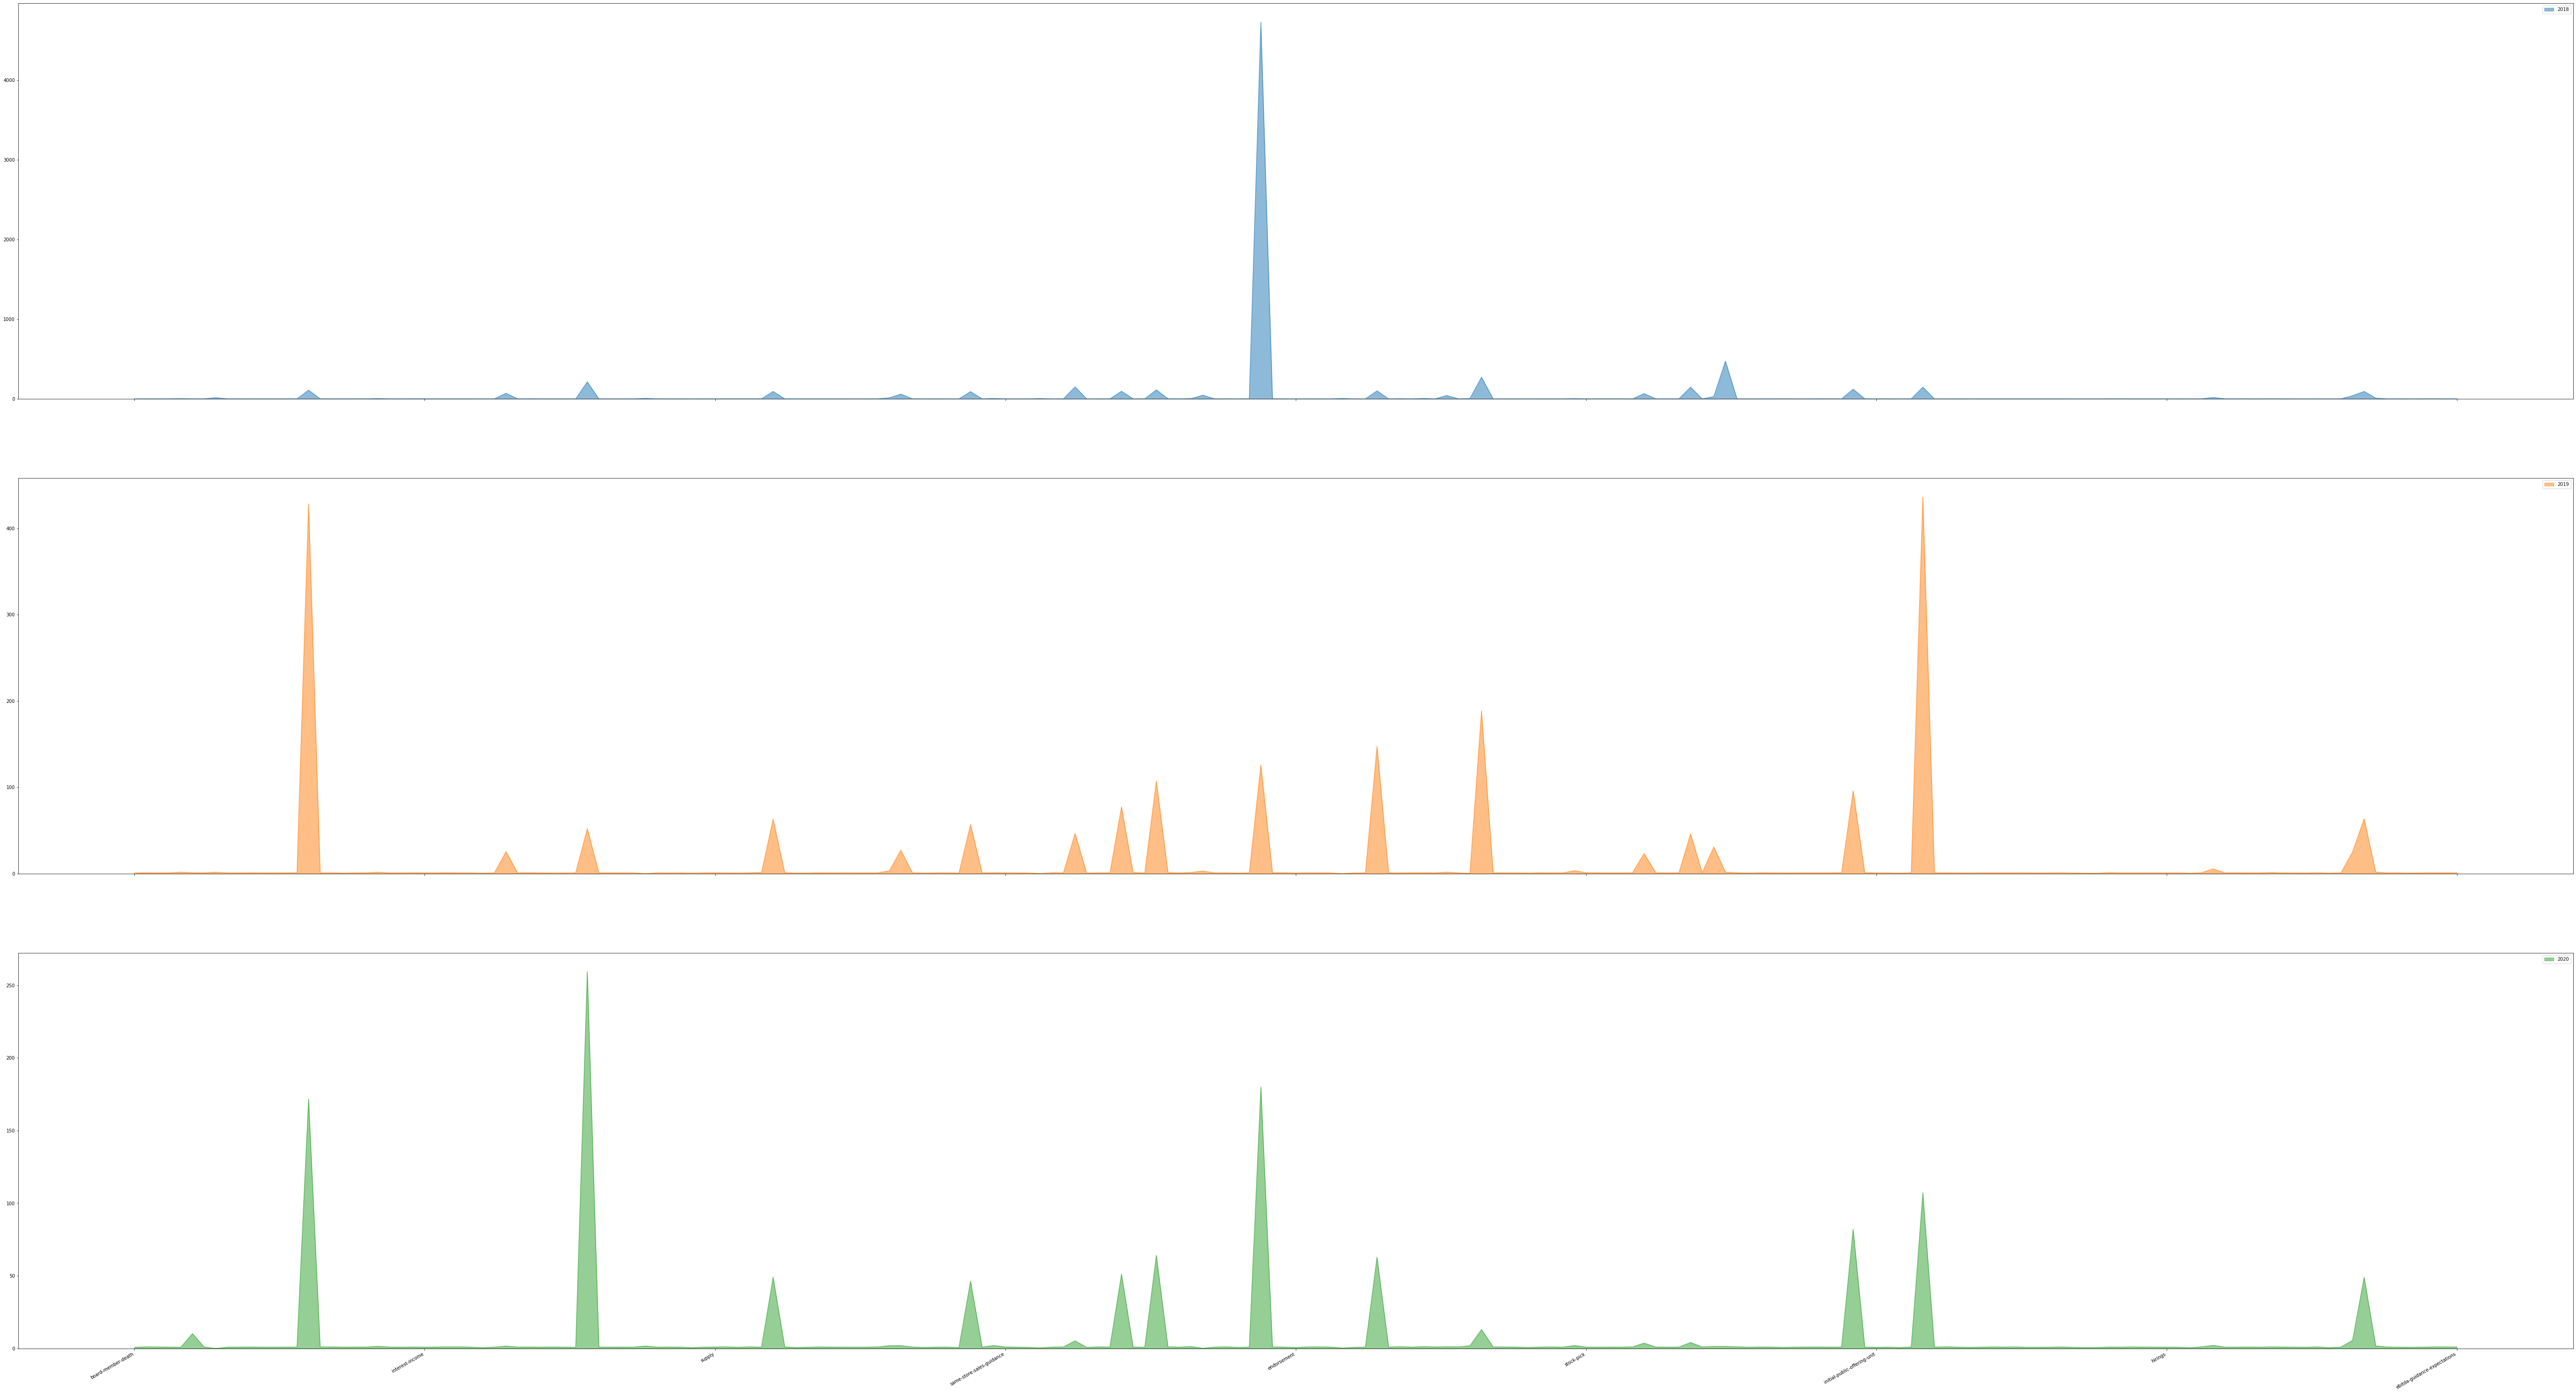

In [13]:
outlierdfall_EN.plot.area(stacked=False,figsize=(100,60),subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d68701c50>,
      dtype=object)

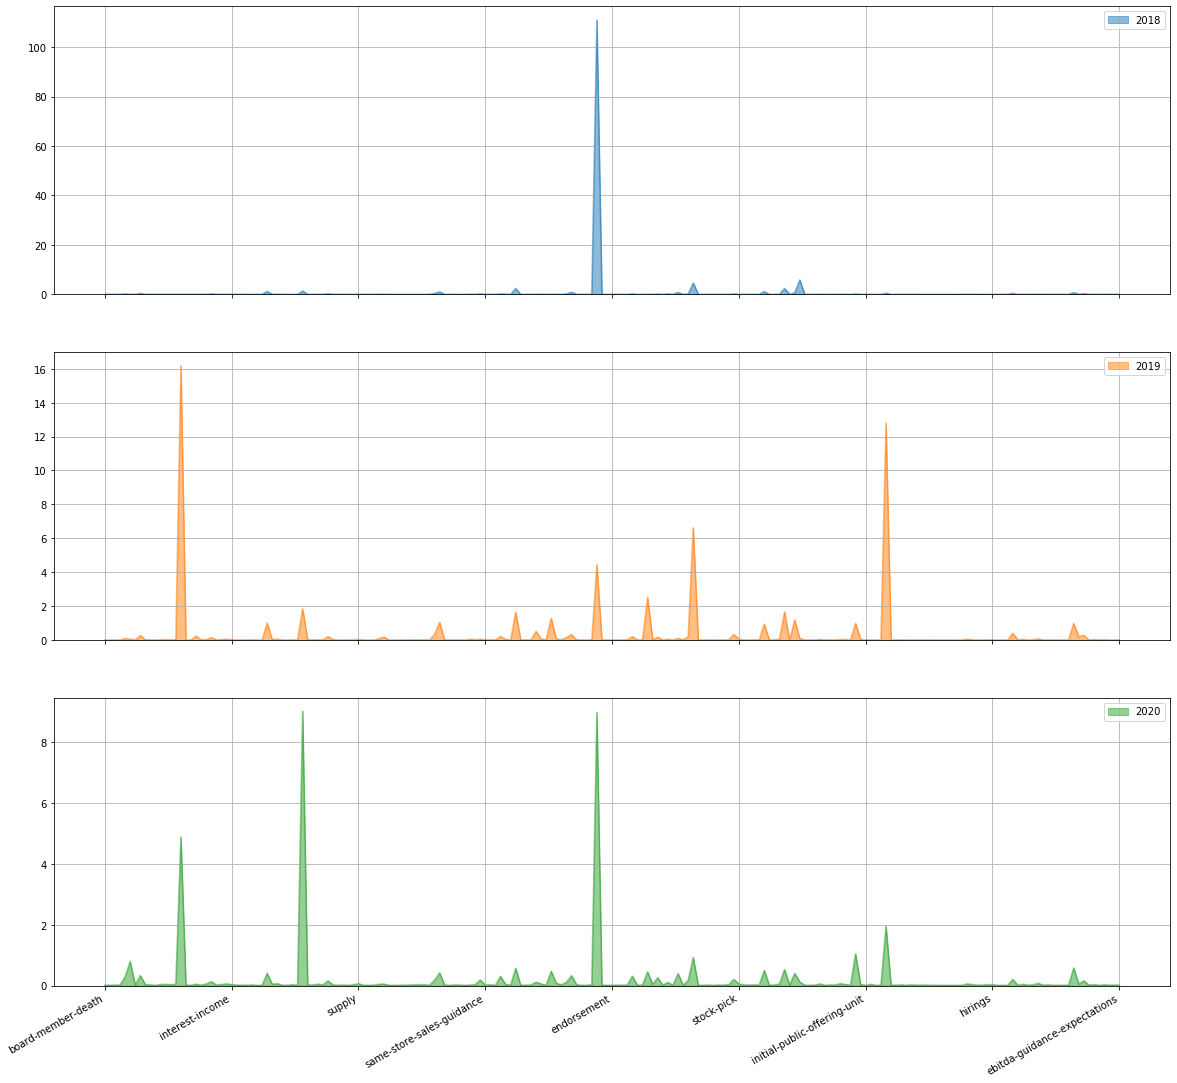

In [14]:
outlierdfall_WE.plot.area(stacked=False,figsize=(20,20),subplots=True,grid=True)

In [65]:
import seaborn as sns
sns.set(style="ticks")



In [67]:
outlierdfall_WE

,2018,2019,2020
executive-retirement,0.021614,0.010248,0.020484
operating-margin,0.013881,0.005124,0.016380
joint-venture,0.036423,0.018596,0.025205
commodity-assets,0.012127,0.004240,0.012158
debt,0.026797,0.018704,0.046193
...,...,...,...
ebit-expectations,0.412609,0.395886,0.205070
endorsement,0.006396,0.002140,0.007906
market-entry,0.030253,0.018036,0.026003
shelf-registration,0.013169,0.004732,0.013830


In [75]:
sns.set(color_codes=True)

In [76]:
df_plottinglist2019_WE

,edges,weights
key,,
accelerated-approval-designation,-7.263802,-7.263781
index-delisting,-6.406296,-6.406249
expenses,-1.001108,-0.841972
workforce-salary,-5.842321,-5.507924
shareholders-meeting,-2.290115,-2.274330
...,...,...
acquisition-bid,-2.389073,-2.256011
auditor-appointment,-5.728418,-5.713101
note-sale,-2.566629,-2.554880


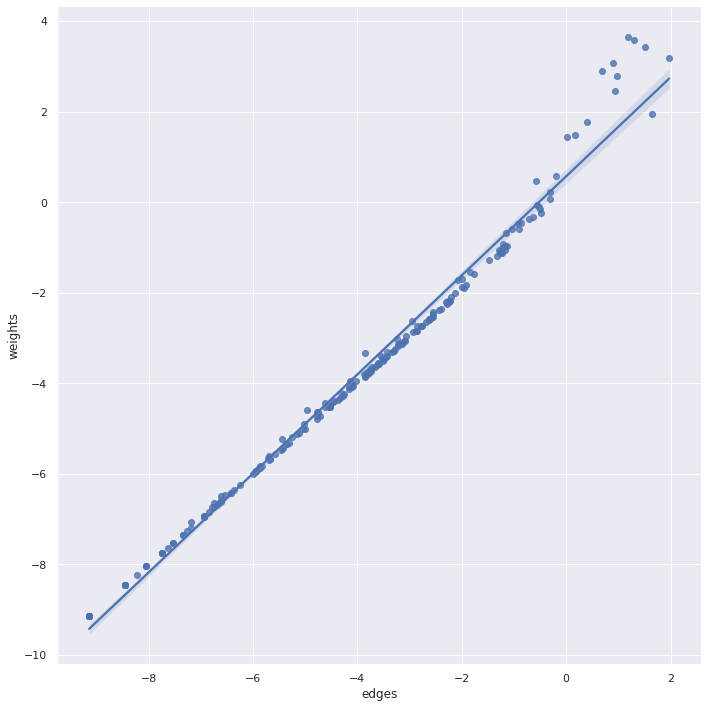

In [90]:
sns.lmplot(x='edges',y='weights',data=df_plottinglist2018_WE,height=10)

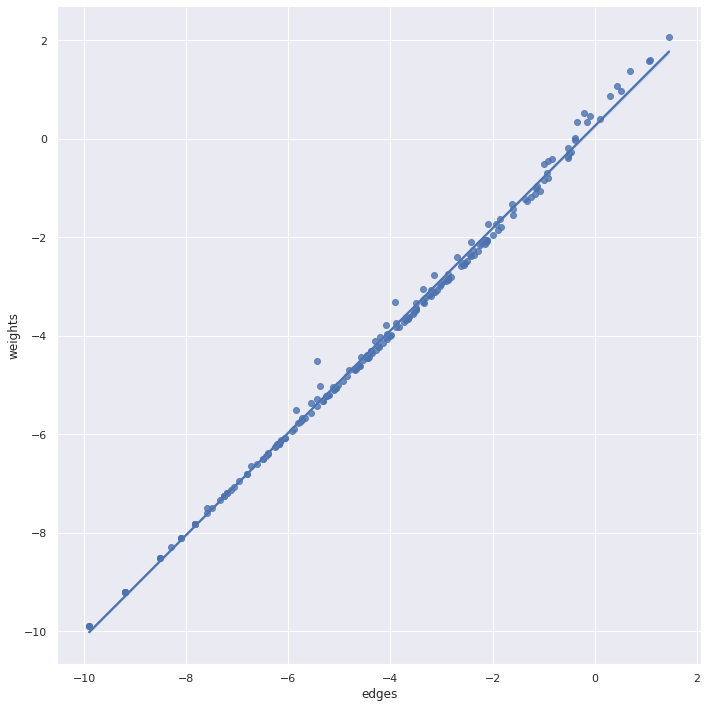

In [91]:
sns.lmplot(x='edges',y='weights',data=df_plottinglist2019_WE,height=10)

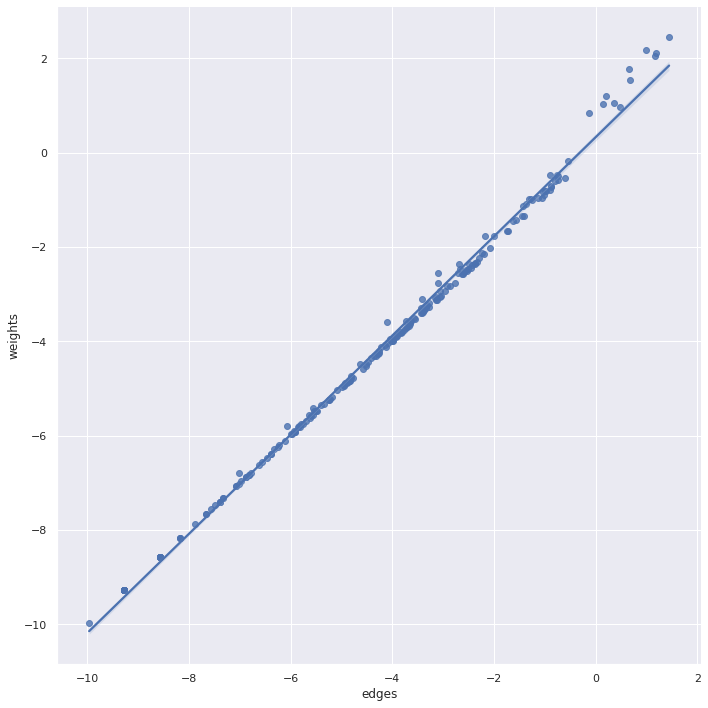

In [92]:
sns.lmplot(x='edges',y='weights',data=df_plottinglist2020_WE,height=10)

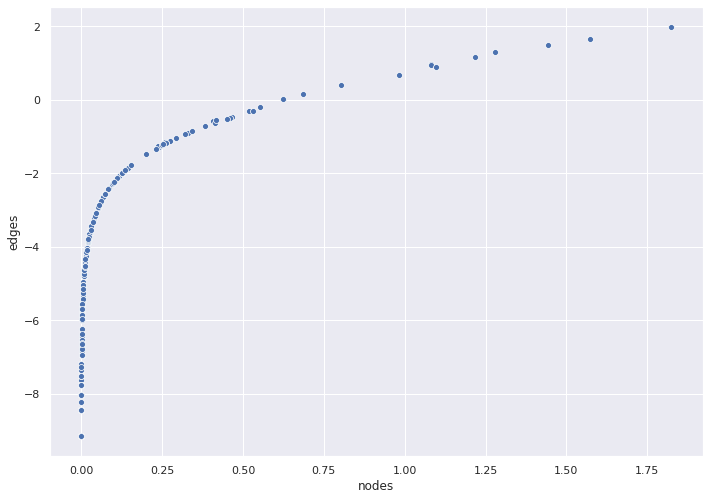

In [103]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2018_EN)

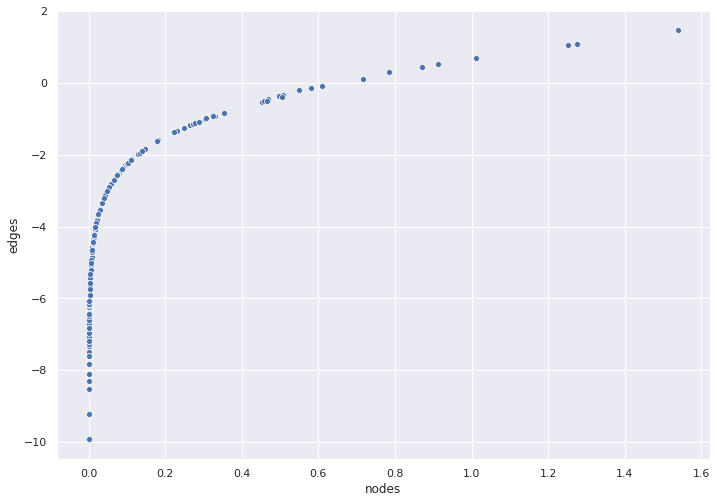

In [104]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2019_EN)

ValueError: `legend` must be 'brief', 'full', or False

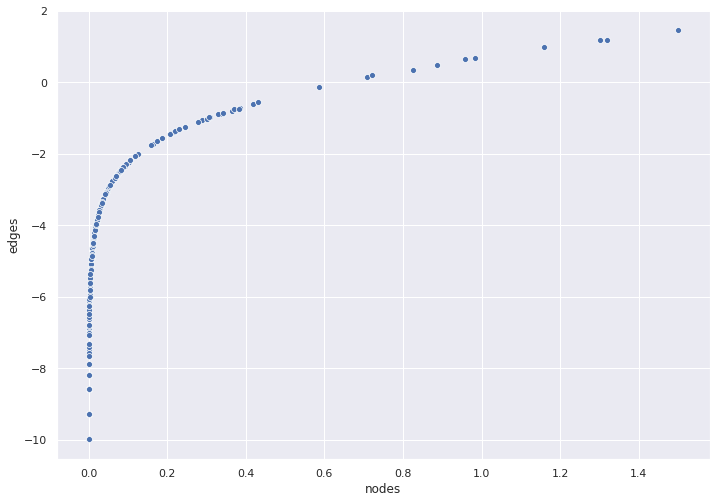

In [134]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2020_EN,legend='logx',label='Scatter plot')

In [135]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2018_EN.nodes.values)
min_x = np.min(df_plottinglist2018_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.log(x)


In [136]:
df2018 = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df2018.columns = ['nodes','edges']

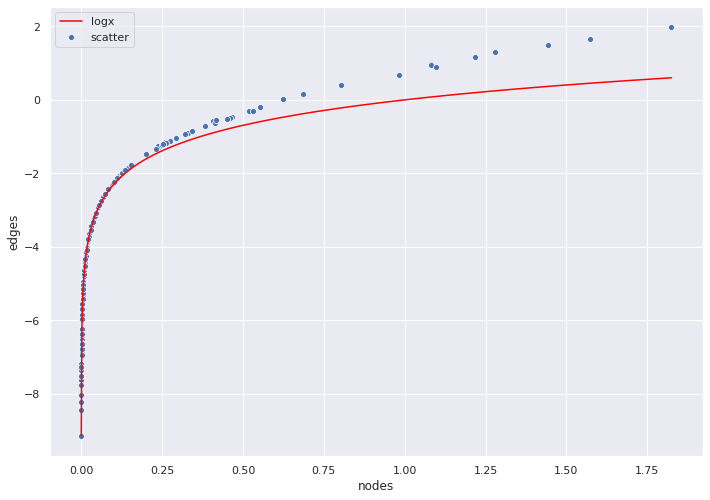

In [141]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2018_EN,label='Scatter plot')
sns.lineplot(x='nodes',y='edges',data=df2018,color='red',label='logx')

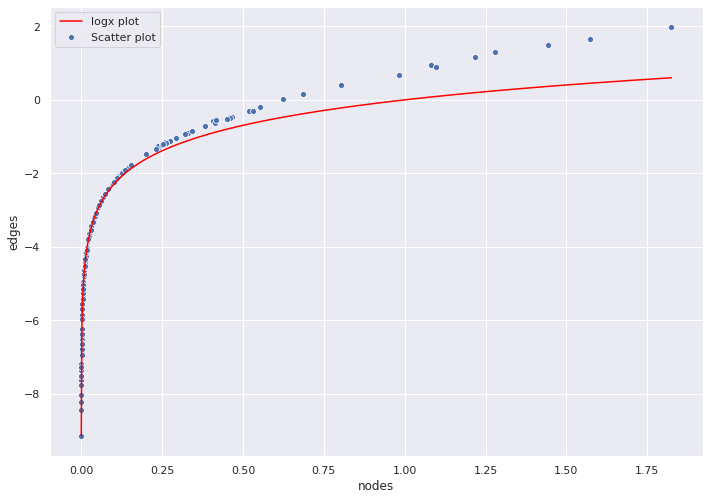

In [142]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2018_EN.nodes.values)
min_x = np.min(df_plottinglist2018_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.log(x)

df2018 = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df2018.columns = ['nodes','edges']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2018_EN,label='Scatter plot')
sns.lineplot(x='nodes',y='edges',data=df2018,color='red',label='logx plot')

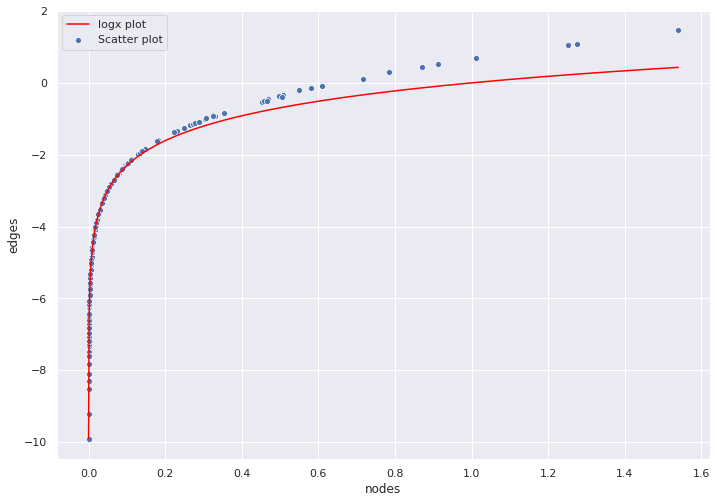

In [143]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2019_EN.nodes.values)
min_x = np.min(df_plottinglist2019_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.log(x)

df2019 = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df2019.columns = ['nodes','edges']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2019_EN,label='Scatter plot')
sns.lineplot(x='nodes',y='edges',data=df2019,color='red',label='logx plot')

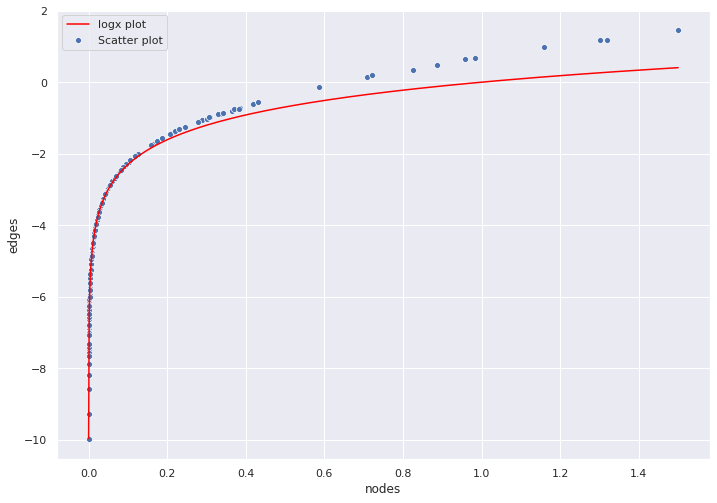

In [144]:
# Plotting Values and Regression Line
max_x = np.max(df_plottinglist2020_EN.nodes.values)
min_x = np.min(df_plottinglist2020_EN.nodes.values)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = np.log(x)

df2020 = pd.concat([pd.Series(x), pd.Series(y)], axis=1)
df2020.columns = ['nodes','edges']

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='nodes',y='edges',data=df_plottinglist2020_EN,label='Scatter plot')
sns.lineplot(x='nodes',y='edges',data=df2020,color='red',label='logx plot')

In [40]:
outlierdfall_WE1 = outlierdfall_WE

In [78]:
outlierdfall_WE1.drop('earnings-per-share-expectations', inplace=True)

KeyError: "['earnings-per-share-expectations'] not found in axis"

In [31]:
outlierdfall_WE1['2018'] = outlierdfall_WE1['2018']/sum(outlierdfall_WE1['2018'])
outlierdfall_WE1['2019'] = outlierdfall_WE1['2019']/sum(outlierdfall_WE1['2019'])
outlierdfall_WE1['2020'] = outlierdfall_WE1['2020']/sum(outlierdfall_WE1['2020'])

In [20]:
max(outlierdfall_WE1['2018'])

110.95537920669156

In [43]:
outlierdfall_WE1

,2018,2019,2020
board-member-death,0.000049,0.000037,0.000232
headquarters-change,0.000092,0.000063,0.000300
insider-gift,0.000110,0.000088,0.000401
clinical-trials-patient-enrollment,0.000093,0.000106,0.000526
insider-buy,0.001334,0.001532,0.007221
...,...,...,...
ebitda-estimate,0.000044,0.000033,0.000234
market-entry,0.000213,0.000293,0.000658
workforce-salary,0.000065,0.000047,0.000365
reorganization-unit,0.000087,0.000073,0.000364


In [28]:
outlierdfall_WE1 = outlierdfall_WE

In [29]:
outlierdfall_WE1.drop('earnings-per-share-expectations',inplace=True)

In [30]:
# outlierdfall_WE1.plot(stacked=False,figsize=(50,10),kind='bar')

In [32]:
filterindex = outlierdfall_WE1[outlierdfall_WE1<0.0002].dropna(how='all').index

In [33]:
outlierdfall_WE3 = outlierdfall_WE1.T[filterindex].T

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

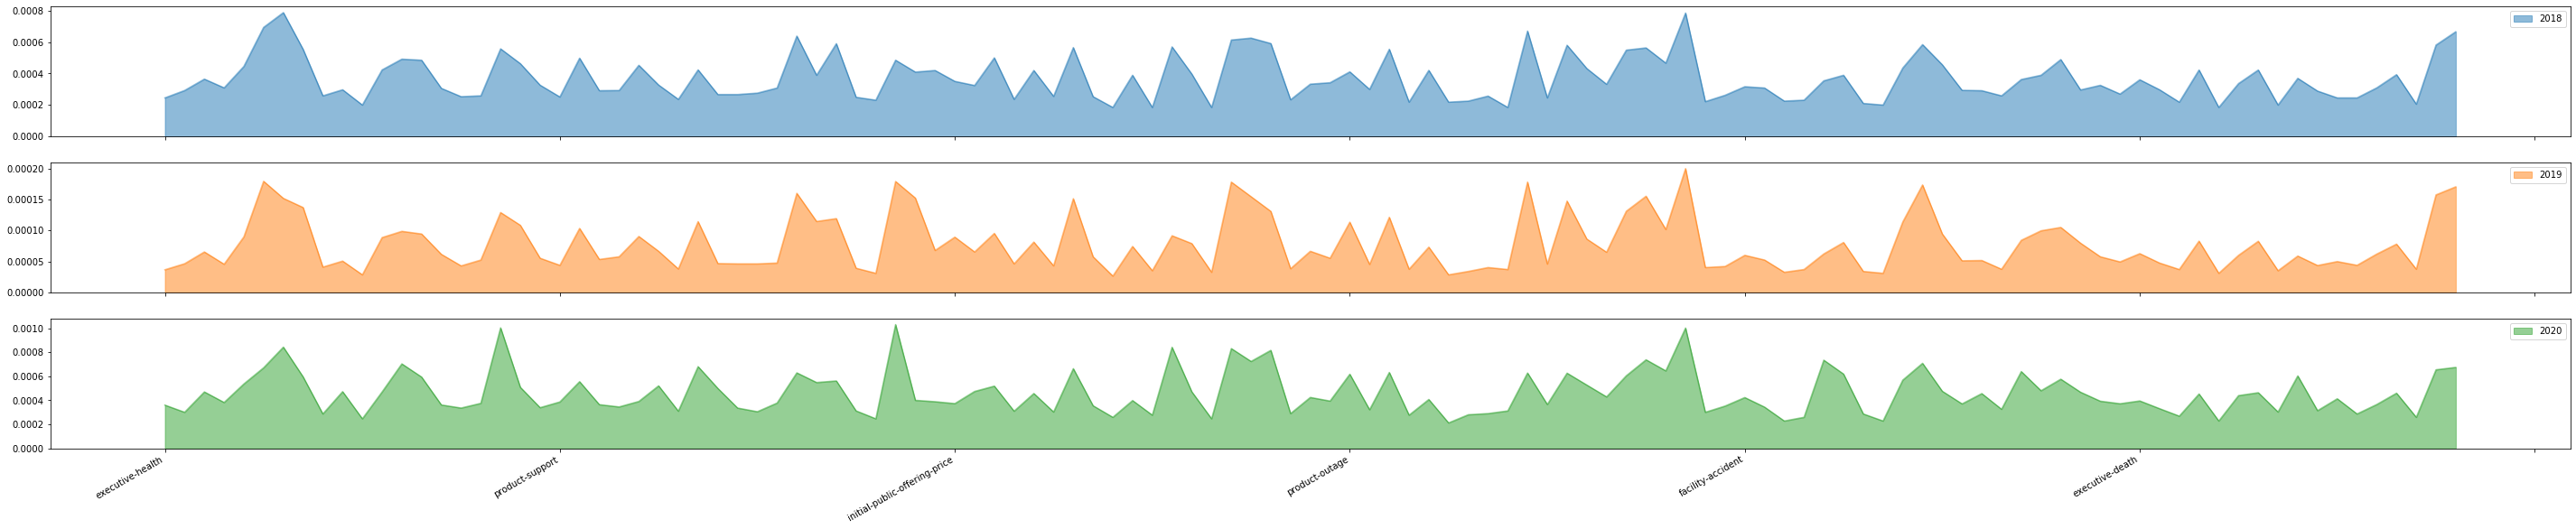

In [38]:
ax = outlierdfall_WE3.plot(stacked=False,figsize=(50,10),kind='area',subplots=True)
ax.set_xlabel('events')
ax.set_ylabel('distance from best fit')

Text(3.1999999999999886, 0.5, 'distance from best fit')

Text(0, 0.5, 'distance from best fit')

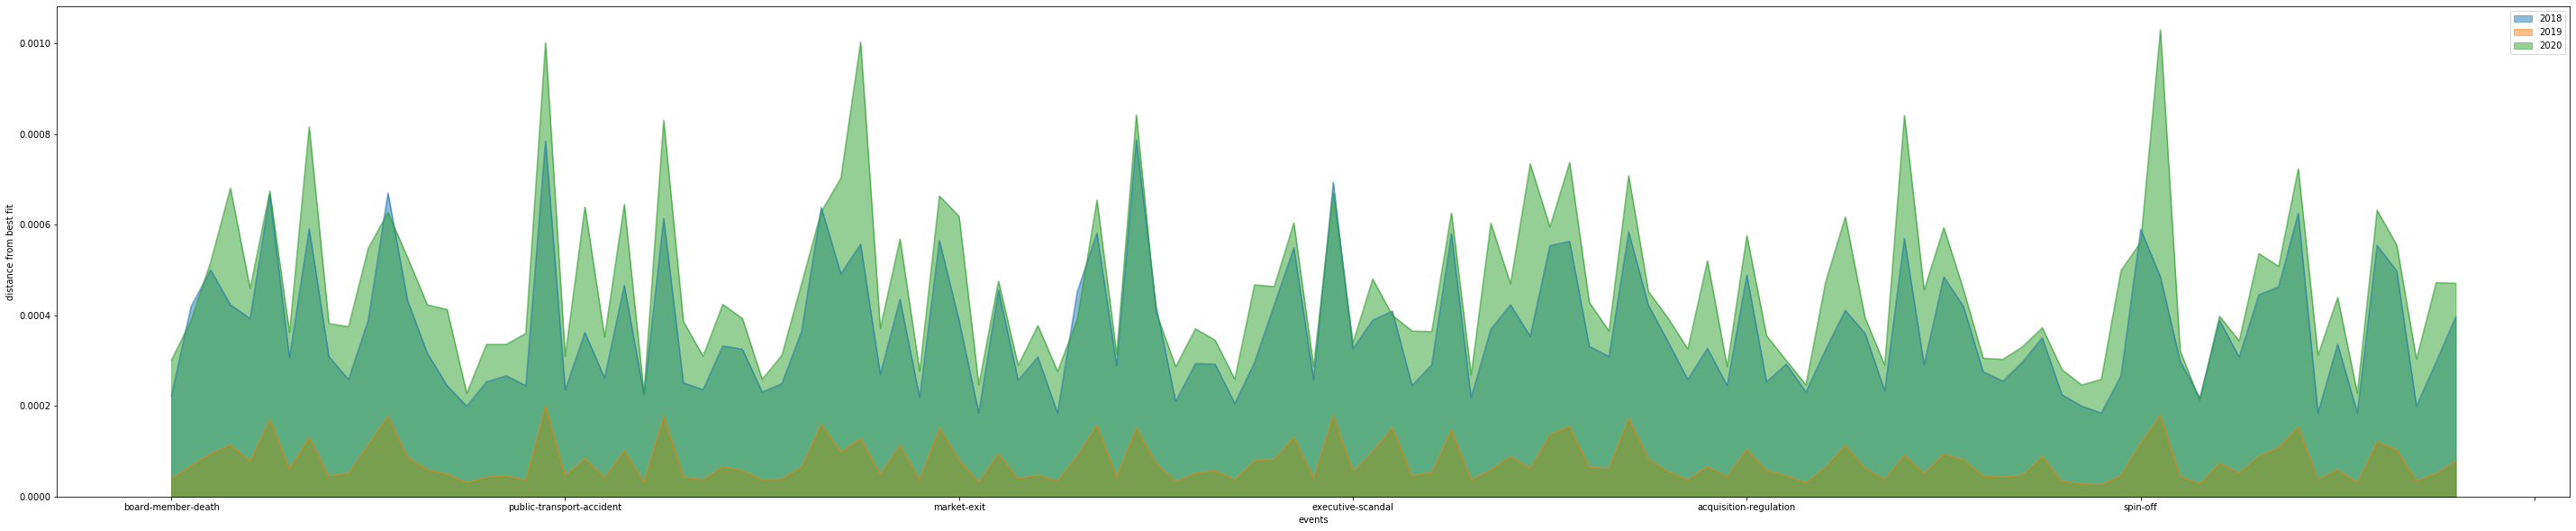

In [84]:
ax = outlierdfall_WE3.plot(stacked=False,figsize=(50,10),kind='area')
ax.set_xlabel('events')
ax.set_ylabel('distance from best fit')

In [22]:
outlierdfall_WE1

,2018,2019,2020
revenue,0.082129,0.187095,0.047648
revenue-estimate,0.225508,0.046263,0.185376
insider-sell,0.855698,0.318750,0.326973
market-entry,0.030253,0.018036,0.026003
executive-health,0.007637,0.002089,0.011006
...,...,...,...
fundraising,0.032023,0.033254,0.050182
drilling,0.018115,0.008998,0.019982
capital-increase,0.020752,0.009740,0.020585
asset,0.224258,0.046136,0.103481
